In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
plt.style.use(['science', 'ieee', 'bright'])
# plt.style.use(['science','ieee'])
term = 'sar'

#### Old data

In [13]:
# result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')[term] # prop2 
# result1 = torch.load('eval_results/0505_120648_Slakh_0505/results.pt')[term] # prop1 
# result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') [term]# base

In [14]:
# result2 = torch.load('eval_results/0505_120845_Slakh_0505/results.pt')['sdr'] # prop2 1:4
# result1 = torch.load('eval_results/0505_120754_Slakh_0505/results.pt')['sdr'] # prop1 
# result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['sdr']# base

In [15]:
# result2_mus = torch.load('eval_results/0505_221055_MUSDB_0506/results.pt')[term] # prop2 1:4
# result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')[term] # prop1 
# # result_base = torch.load('eval_results/0418_221450_MUSDB_0506/results.pt') ['sdr']# base
# result_base_mus = torch.load('eval_results/0418_221450_MUSDB_0509/results.pt') [term]# base

In [7]:
# def build_data(data):
#     data = np.array(data).T
#     return list(data)

In [8]:
# # data_base = build_data(result_base)
# # data_1 = build_data(result1)
# # data_2 = build_data(result2)
# data_base_m = build_data(result_base_mus)
# data_1_m = build_data(result1_mus)
# data_2_m = build_data(result2_mus)

#### New data

In [79]:
model_name = '0505_221055' # 1:1
# model_name = '0505_220633' # 1:4
dataset = 'MUSDB'
prop2_m = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

model_name = '0505_220936' # 1:1
# model_name = '0505_220715' # 1:4
dataset = 'MUSDB'
prop1_m = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

model_name = '0418_221450'
dataset = 'MUSDB'
baseline_m = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

model_name = '0505_120551' # 1:1
# model_name = '0505_220633' # 1:4
dataset = 'Slakh'
prop2 = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

model_name = '0505_120648' # 1:1
# model_name = '0505_220715' # 1:4
dataset = 'Slakh'
prop1 = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

model_name = '0417_200733'
dataset = 'Slakh'
baseline = torch.load('src/samples/{}_min_scores_{}.npy'.format(model_name, dataset)) #(68, 10)

term = 'sdr'

# p2_sdr = np.array(prop2['bss_sdr_list'])
# p2_sar = np.array(prop2['bss_sar_list'])
# p2_sir = np.array(prop2['bss_sir_list'])

# p1_sdr = np.array(prop1['bss_sdr_list'])
# p1_sar = np.array(prop1['bss_sar_list'])
# p1_sir = np.array(prop1['bss_sir_list'])

# bl_sdr = np.array(baseline['bss_sdr_list'])
# bl_sar = np.array(baseline['bss_sar_list'])
# bl_sir = np.array(baseline['bss_sir_list'])

p2 = np.array(prop2['bss_{}_list'.format(term)])
p1 = np.array(prop1['bss_{}_list'.format(term)])
bl = np.array(baseline['bss_{}_list'.format(term)])

p2_m = np.array(prop2_m['bss_{}_list'.format(term)])
p1_m = np.array(prop1_m['bss_{}_list'.format(term)])
bl_m = np.array(baseline_m['bss_{}_list'.format(term)])

In [80]:
def build_data(data):
    data = np.array(data).T
    return list(data)
data_base = build_data(bl)
data_1 = build_data(p1)
data_2 = build_data(p2)

data_base_m = build_data(bl_m)
data_1_m = build_data(p1_m)
data_2_m = build_data(p2_m)

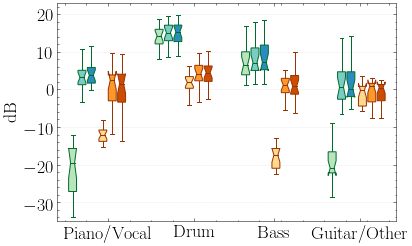

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# data list (4,N) 

ticks = ['Piano/Vocal', 'Drum', 'Bass', 'Guitar/Other']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig, ax = plt.subplots(figsize=(6,3.5))


# bp1 = plt.boxplot(data_base, positions=np.array(range(len(data_base)))*2.0-0.6, sym='', widths=0.2)
# bp4 = plt.boxplot(data_base_m, positions=np.array(range(len(data_base_m)))*2.0-0.4, sym='', widths=0.2)
# bp2 = plt.boxplot(data_1, positions=np.array(range(len(data_1)))*2.0-0.2, sym='', widths=0.2)
# bp5 = plt.boxplot(data_1_m, positions=np.array(range(len(data_1_m)))*2.0, sym='', widths=0.2)
# bp3 = plt.boxplot(data_2, positions=np.array(range(len(data_2)))*2.0+0.2, sym='', widths=0.2)
# bp6 = plt.boxplot(data_2_m, positions=np.array(range(len(data_2_m)))*2.0+0.4, sym='', widths=0.2)

# [romt]
width=1.1
# print(len(data_base))
bp1 = plt.boxplot(data_base, positions=(np.array(range(len(data_base)))+0.4)*12-5.7,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)
bp2 = plt.boxplot(data_1, positions=(np.array(range(len(data_base)))+0.4)*12-4.4,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)
bp3 = plt.boxplot(data_2, positions=(np.array(range(len(data_base)))+0.4)*12 - 3.1,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)

bp4 = plt.boxplot(data_base_m, positions=(np.array(range(len(data_base)))+0.4)*12-1.5 ,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)
bp5 = plt.boxplot(data_1_m, positions=(np.array(range(len(data_base)))+0.4)*12-0.2,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)
bp6 = plt.boxplot(data_2_m, positions=(np.array(range(len(data_base)))+0.4)*12+1.1,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=False, showmeans=False, meanline=False, notch=True)

# set_box_color(bp1, '#bae4bc') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#7bccc4') # colors are from http://colorbrewer2.org/
# set_box_color(bp3, '#2b8cbe')
# set_box_color(bp4, '#fed98e') # colors are from http://colorbrewer2.org/
# set_box_color(bp5, '#fe9929') # colors are from http://colorbrewer2.org/
# set_box_color(bp6, '#cc4c02')

set_box_color(bp1, '#006d2c') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#006d2c') # colors are from http://colorbrewer2.org/
set_box_color(bp3, '#006d2c')
set_box_color(bp4, '#993404') # colors are from http://colorbrewer2.org/
set_box_color(bp5, '#993404') # colors are from http://colorbrewer2.org/
set_box_color(bp6, '#993404')

# set_box_color(bp4, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp5, 'green') # colors are from http://colorbrewer2.org/
# set_box_color(bp6, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
# plt.plot([], c='#D7191C', label='Baseline')
# plt.plot([], c='green', label='Model I')
# plt.plot([], c='#2C7BB6', label='Model II')
# plt.plot([], c='#D7191C', label='Baseline')
# plt.plot([], c='green', label='Model I')
# plt.plot([], c='#2C7BB6', label='Model II')
# plt.legend()
for patch in bp1['boxes']:
#     patch.set_facecolor('#656565')
    patch.set_facecolor('#bae4bc')
for patch in bp2['boxes']:
    patch.set_facecolor('#7bccc4')
for patch in bp3['boxes']:
    patch.set_facecolor('#2b8cbe')
for patch in bp4['boxes']:
    patch.set_facecolor('#fed98e')
for patch in bp5['boxes']:
    patch.set_facecolor('#fe9929')
for patch in bp6['boxes']:
    patch.set_facecolor('#cc4c02')
    
    
    
#for box in bp1['boxes']:
#    box.set(hatch = '//')
# for box in bp3['boxes']:
#     box.set(hatch = )
# for box in bp2['boxes']:
#     box.set(hatch = '..')
# for box in bp3['boxes']:
#     box.set(hatch = '///')

# # for box in bp3['boxes']:
# #     box.set(hatch = '*')
# for box in bp5['boxes']:
#     box.set(hatch = '..')
# for box in bp6['boxes']:
#     box.set(hatch = '///')
#for box in bp6['boxes']:
#    box.set(hatch = '--')
    
plt.ylabel('dB',fontsize=18)    
# plt.legend([bp1["boxes"][0],bp2["boxes"][0],bp3["boxes"][0], bp4["boxes"][0],bp5["boxes"][0],bp6["boxes"][0]], 
#            ['BL - S','I - S','II - S','BL - M', 'I - M','II - M'], 
#            loc='lower center', fontsize=14, frameon=True, markerscale=0,  ncol=2,bbox_to_anchor=(0.4, 0))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
# plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xticks([4, 16, 27, 39], ticks, fontsize=18)
plt.xlim(-3, 44)
plt.yticks(fontsize=18)
# plt.text(37, 16.5, 'SDR', fontsize=11)

plt.ylim(-35, 23) # sdr
# plt.ylim(-25, 23) # sar
# plt.ylim(-30, 38) # sir
# plt.tight_layout()
plt.savefig('boxcompare_{}.pdf'.format(term))

In [52]:
result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')['scores'][0] # prop2 
result1 = torch.load('eval_results/0505_120648_Slakh_0510/results.pt')['scores'] # prop1 
result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['scores'][0]# base

FileNotFoundError: [Errno 2] No such file or directory: 'eval_results/0505_120551_Slakh_0505/results.pt'

In [402]:
result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')['scores'][0] # prop2 
result1 = torch.load('eval_results/0505_120648_Slakh_0505/results.pt')['scores'][0] # prop1 
result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['scores'][0]# base

In [184]:
result2_mus = torch.load('eval_results/0505_221055_MUSDB_0506/results.pt')['scores'][0] # prop2 1:4
result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')['scores'][0] # prop1 
# result_base = torch.load('eval_results/0418_221450_MUSDB_0506/results.pt') ['sdr']# base
result_base_mus = torch.load('eval_results/0418_221450_MUSDB_0509/results.pt')['scores'] # base

In [157]:
result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')['scores'] # prop1 

In [199]:
data2 = list(np.mean(np.array(result2).reshape(-1, 15), 0))
data1 = np.mean(np.array(result1).reshape(-1, 15), 0)
data_base = np.mean(np.array(result_base).reshape(-1, 15), 0)

/media/sdb1/hy17/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


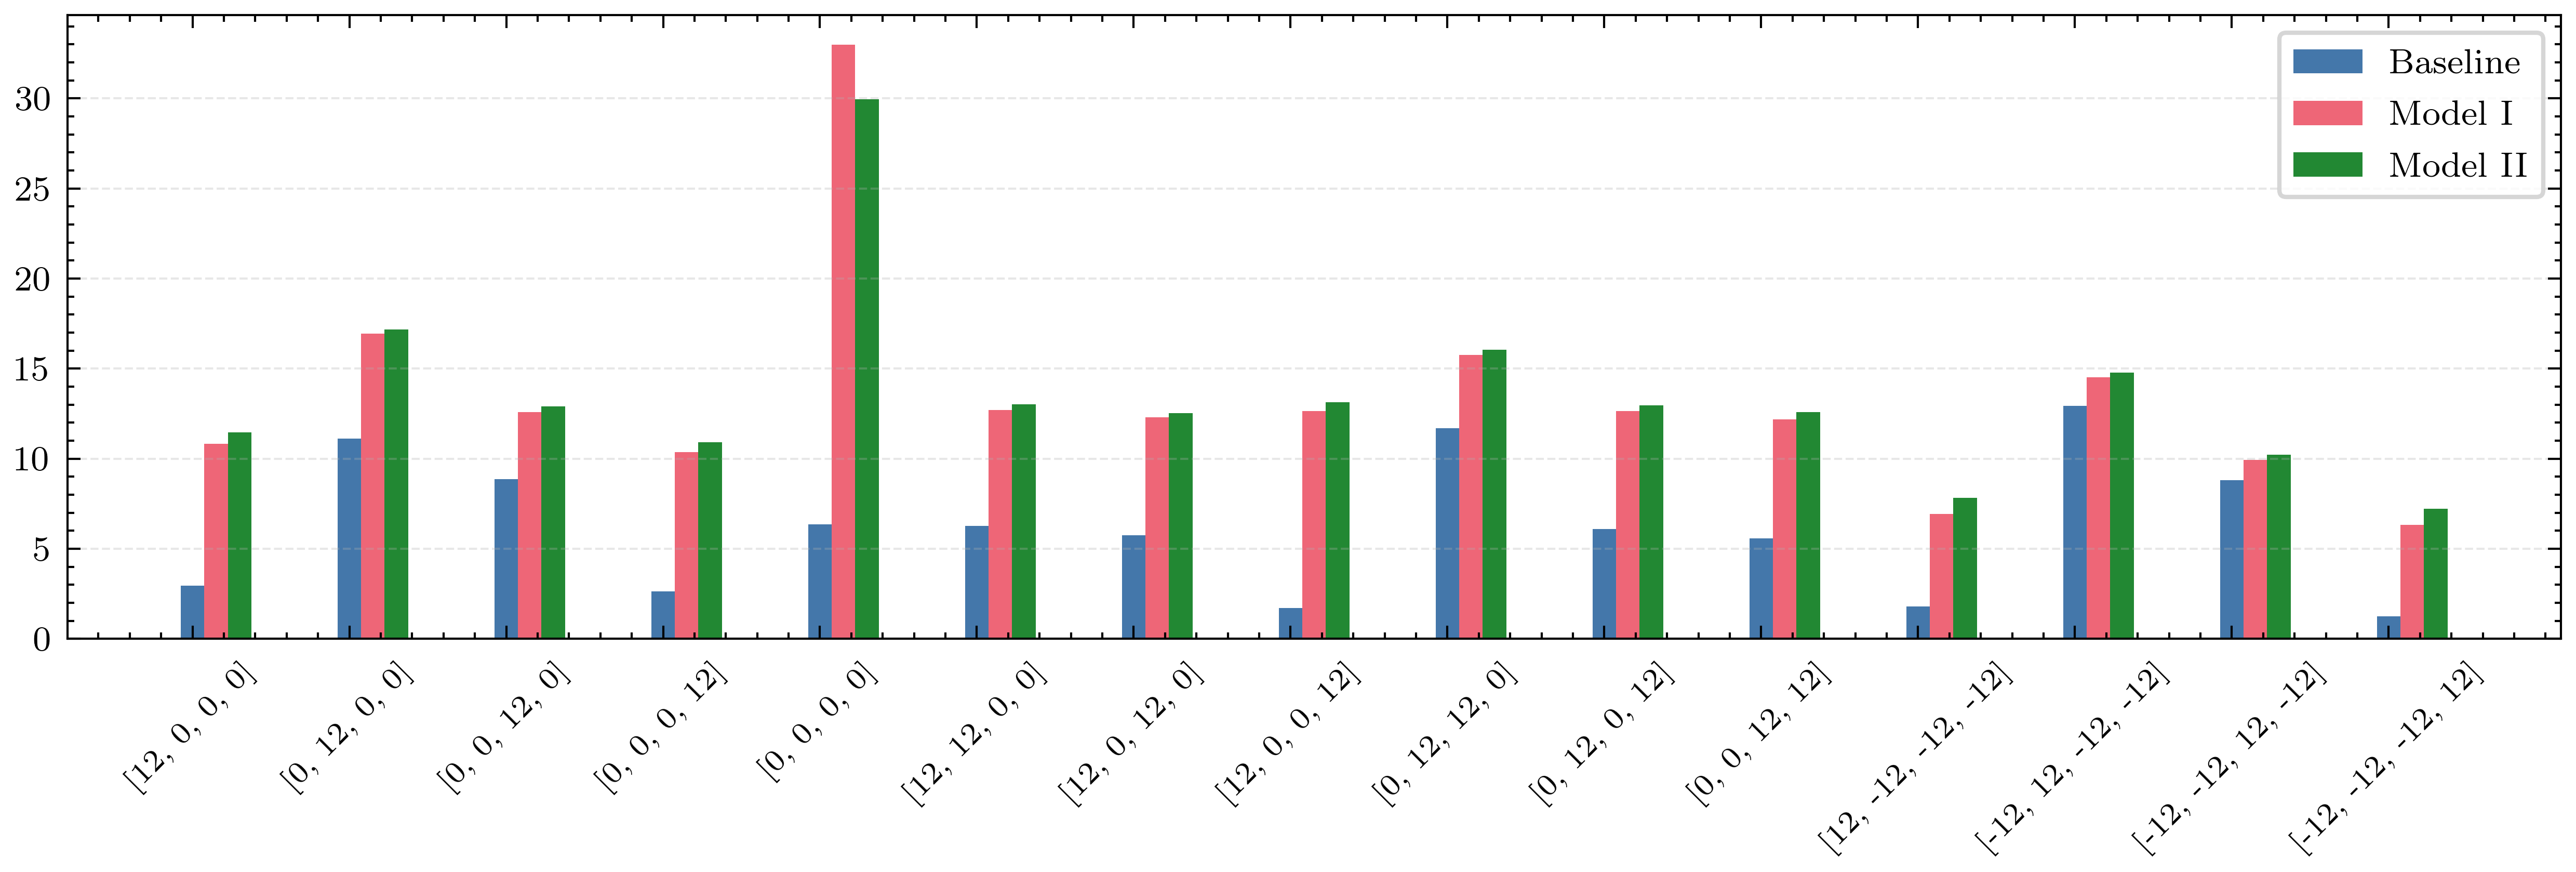

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# f = plt.figure()


X = np.array(range(15))
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(2)
ax = fig.add_axes([0,0,1,1])

labels = [
[12, 0,0,0],
[0, 12,0,0],
[0, 0,12,0],
[0, 0,0,12],
[0, 0,0,0],
[12, 12, 0, 0], 
[12, 0, 12, 0],  
[12, 0, 0, 12], 
[0, 12, 12, 0], 
[0, 12, 0, 12],  
[0, 0, 12, 12], 
[12, -12,-12,-12],
[-12, 12,-12,-12],
[-12, -12,12,-12],
[-12, -12,-12,12]]

ax.bar(X + 0.00, data_base,  width = 0.15, label = 'Baseline')
ax.bar(X + 0.15, data1,  width = 0.15, label='Model I')
ax.bar(X + 0.30, data2,  width = 0.15, label='Model II')

plt.xticks(np.array(range(15)),labels, fontsize=7, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(frameon=True)
plt.savefig('ratios.pdf')

In [82]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
plt.style.use(['science', 'ieee', 'bright'])

In [83]:
x1 = [0.75,0.666666667,1,1,1,1,0.6,0.8,0.75,0.8]
x2 = [1,0.75,0.5,0.75,0.75,0.5,0.6]
x3 = [0.75,0.666666667,0.4,0.333333333,0.6,0.5,0.2,0.4,0.2,0.6]
x4 = [0.25,1,0.5,0.5,0.6,0.75,0.6,0.4]
x5 = [1,1,1,1,1,1,0.8,1,1,0.6]

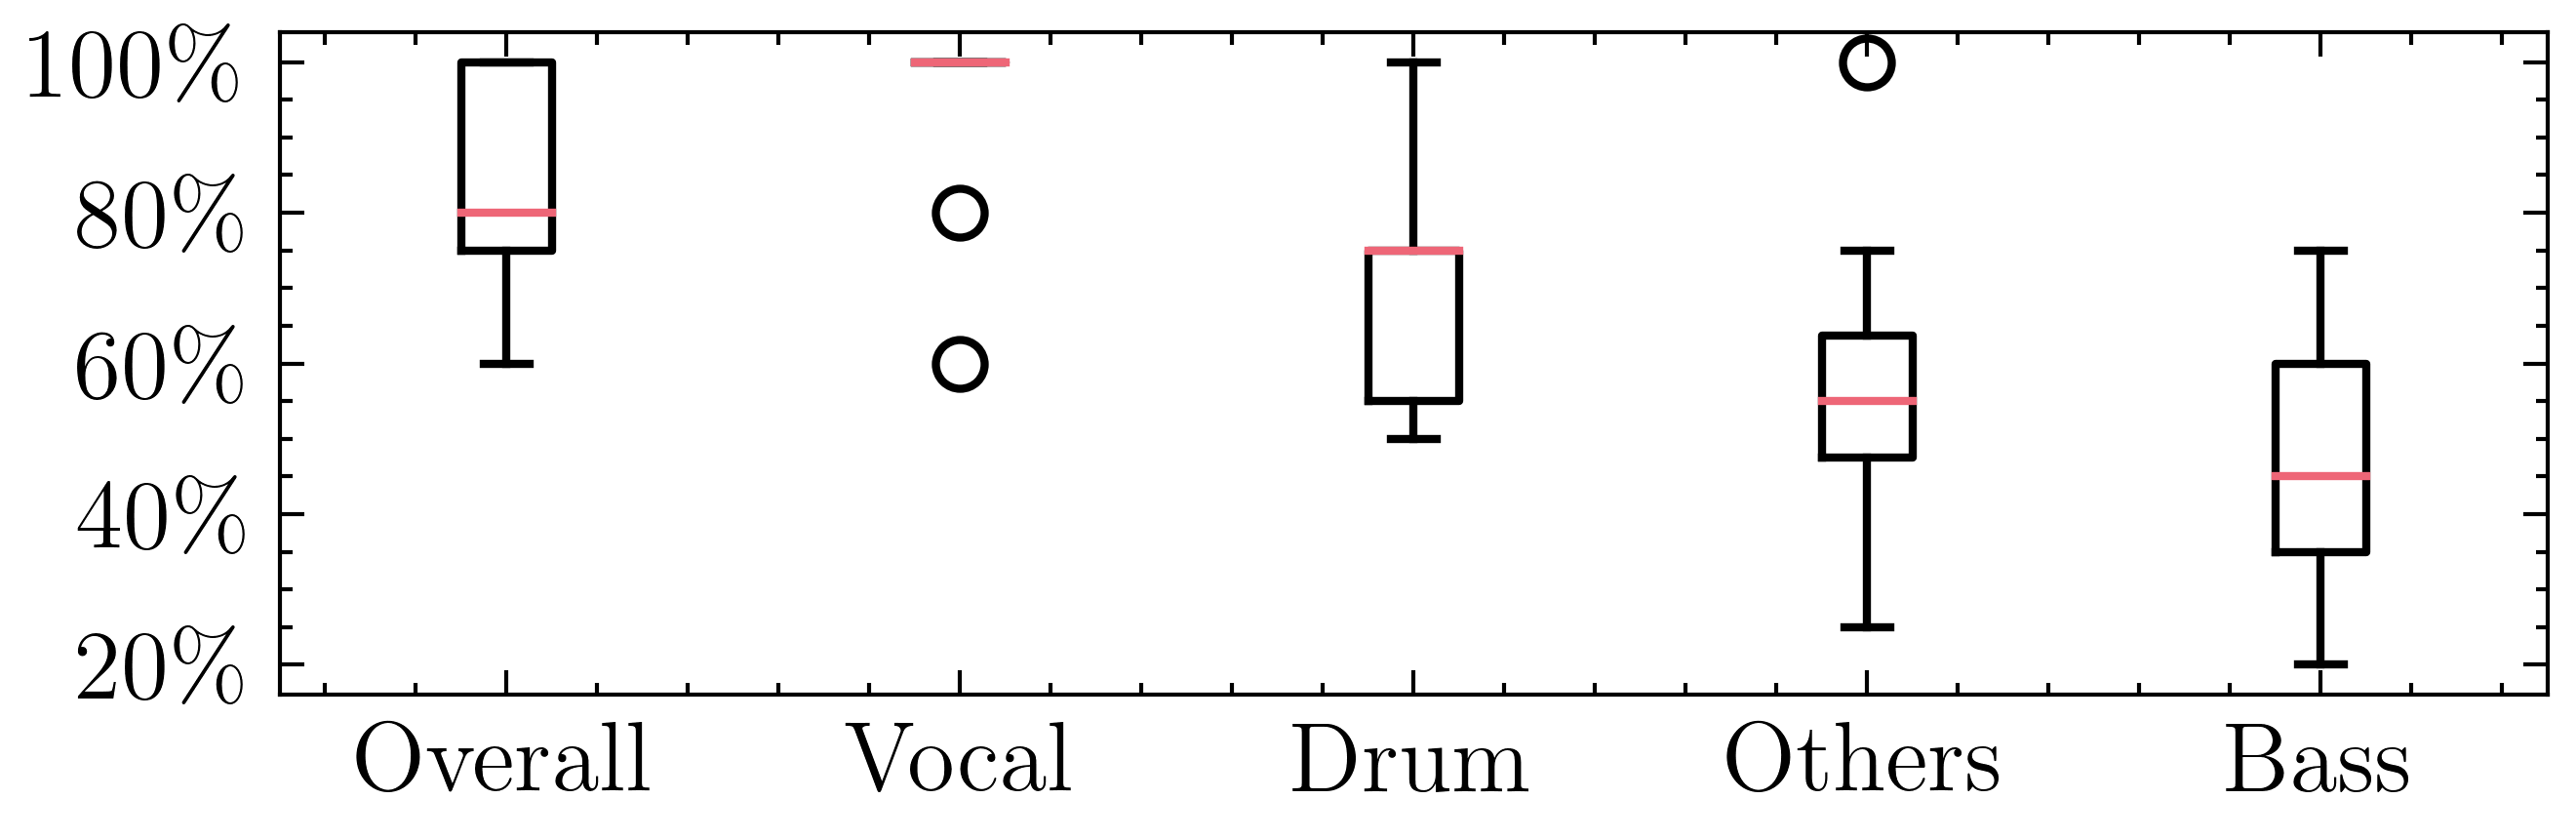

In [106]:
plt.figure(figsize=(5, 1.5))
xticks = ['Overall', 'Vocal', 'Drum', 'Others', 'Bass']
yticks = ['20\%', '40\%', '60\%', '80\%', '100\%']
# yticks = ["{:.0%}".format(0.2), "{:.0%}".format(0.4), \
#           "{:.0%}".format(0.6), "{:.0%}".format(0.8),"{:.0%}".format(1)]
# print(yticks)
# "{:.0%}".format(0.2)
plt.boxplot([x1, x5, x2, x4, x3], widths=0.2, 
            showfliers=True, showmeans=False, meanline=True)
plt.xticks(range(1,6),xticks, fontsize=12)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], yticks, fontsize=12)
# plt.ylabel('Preference')
plt.savefig('boxplot.pdf')
plt.show()

In [95]:
"{:.0%}".format(0.2)

'20%'